# **ESS314: Lab5: Earthquake Location**

we will be using two different methods (triangulation and grid search) to find the location of an earthquake epicenter.

Distance $d$, time $t$, and velocity $v$ are simply related by

$d = vt$. (1)

Therefore, a P-wave traveling for time $t$ at velocity $V_P$ will move across a distance $r$, where $r$ is given by

$𝑟 = 𝑉_Pt$. (2)

![](fig1.png)

The time necessary for the P-wave to travel a distance r can be obtained by dividing equation (2) by $V_P$:

$𝑡 = 𝑟 /𝑉_P$ (3)

![](fig2.png)

If a P-wave is generated from an earthquake (EQ) at the origin time $𝑇_0$ (the time the earthquake starts), the first wiggle on the seismogram will arrive at the observation station labeled “seismometer 1”, at a distance $r_1$ from the earthquake, at the time $T_0$ given by

$T_p^1 = T_0 + r_1/V_P$ (4)

where the superscript 1 indicates the seismometer.

In equation (4), the first term on the right-hand side (RHS) is the start time of the EQ, and the second term on the RHS is the time it takes the P-wave ray to reach the seismometer located at
a distance $r_0$ from the EQ.

Similarly, an S-wave from the same earthquake traveling at a velocity $V_S$ will arrive at seismometer 1 at time $T_S^1$, given by 

$T_s^1 = T_0 + r_1/V_S$ (5)


Since S-waves travel more slowly than P-waves, $T_S^1 > T_P^1$.

Now we have a problem. Equations (4) and (5) both contain the unknown origin time $T_0$ . However, if we subtract equation (4) from equation (5) we eliminate $T_0$ and obtain the following very useful result:

$T_S^1 - T_P^1 = r_1/V_S - t_1/V_P = r_1 (1/V_S - 1/V_P)$ (6)


Equation (6) defines the S-P time (“S minus P time”) for the event as recorded at seismometer 1: $T_{s-p} = T_S^1 - T_P^1$. We will use $T_{s-p}^1$ to represent the S-P time for this event at station 1.

![](fig3.png)


The S-P time depends on the distance from the earthquake to the seismic station and the relative times between the P and S wave, which can be variable based on 3D earth structure.

As part of Lab 2: you calculated P and S wave traveltime curves for an earthquake located 10 km below the surface. Your plot should have looked something like this:


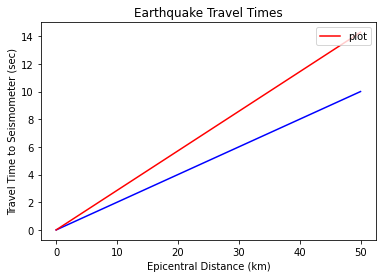

In [1]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0,50,50) # km
vp = 5  # km/s, this is 5000 m/s
vs = 3.5 # km/s, this is 3500 m/s
tp = r/vp
ts = r/vs

fig = plt.plot(r,tp, 'b-') 
fig = plt.plot(r,ts, 'r-', label='plot')
plt.xlabel('Epicentral Distance (km)')
plt.ylabel('Travel Time to Seismometer (sec)')
plt.title("Earthquake Travel Times")
plt.legend(loc=1)
plt.show()

### **Question 1:**

> a. *What happens to the S-P travel time as you get farther away from the epicenter?*

answer here:

> b. *An earthquake is recorded at two seismic stations, station A and station B. If station A is 10 km from the epicenter (point on Earth’s surface directly above where the earthquake rupture began), and station B is 100 km from the epicenter, which station will exhibit a larger S-P time?*

answer here:

Comparing equations (3) and (6), you may notice that the time separation between the **P-wave arrival** (peak on the seismogram corresponding to the first arrival of a P-wave at the seismometer) and the **S-wave arrival** (peak on the seismogram corresponding to the first arrival of an S-wave at the seismometer) has an effective velocity by which it increases with distance:

$V_{s-p} = \dfrac{1}{1/V_S - 1/V_P}$ . (7)

The quantity  $V_{s-p}$ is called the **effective S-P velocity**.

Therefore, the distance r1 from seismometer 1 to the earthquake can be computed from seismograms (P-wave and S-wave arrival times) as

$r_1 = V_{s-p}T^1_{s-p}$, (8)

where $ T^1_{s-p} $ is measured on a seismogram, but $ V_{s-p} $ is based on knowledge of Earth properties, as values for both $V_P$ and $V_S$ are necessary to make this calculation (eqn 7). In other words, we need to have some idea of the P-wave and S-wave velocities in the Earth.

We are going to download data from the [IRIS DMC](https://ds.iris.edu/ds/nodes/dmc/) data center. The data was collected from the [Pacific Northwest Seismic Network](https://pnsn.org/). We focus on the M 7.8 October 27, 2012 Haida Gwaii earthquake.


In [22]:
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
# create the link between you and the IRIS-DMC
client    = Client('IRIS')
# Origin time of the Nisqually earthquake   
s1 = obspy.UTCDateTime(2001,2,28,18,54,37)                 
# collect the information about what data is available
inv = client.get_stations(network="UW",station="*",channel="BHZ",location="*",starttime=s1,endtime=s1+86400)
print(inv)

# create a list of the stations you found
sta=list()
for k in inv:
    for sta1 in k:
        sta.append(sta1.code)
# print the list of the stations we would be using
print("The stations we will be using are:")
print(sta)

Inventory created at 2021-10-28T17:11:29.039000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2001-02-28...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			UW
		Stations (7):
			UW.GNW (Green Mountain, WA, USA)
			UW.LON (Longmire CREST broad-band)
			UW.LTY (Liberty Mine, WA, USA)
			UW.RWW (Ranney Well CREST BB SMO)
			UW.SEP (September lobe, Mt. St. Helens (Dome sta))
			UW.SQM (PNNL - Sequim, WA, USA)
			UW.TTW (Tolt Res, WA CREST BB SMO)
		Channels (0):

The stations we will be using are:
['GNW', 'LON', 'LTY', 'RWW', 'SEP', 'SQM', 'TTW']


Mapping in python requires a few more packages, so we found a map of where these stations are on the IRIS-GMAP tool https://ds.iris.edu/gmap and annotated the stations.

![](map_station.png)

marine will add a legend for a scale of distance.

In [24]:
# download data:
tr=obspy.Stream()
# we will update sta to make sure we have all of the stations

# create a list of the stations you found
sta1=list()
# s1 = obspy.UTCDateTime(2012,10,28,3,4,0) # this is the Haida Gwaii M7.8 2012 earthquake.
s1 = obspy.UTCDateTime(2001,2,28,18,54,37)   
for ista in sta:
    try:
        tr += client.get_waveforms(network="UW",station=ista,channel="*HZ",location="*",starttime=s1,endtime=s1+100)
        sta1.append(tr[-1].stats.station)
        print(tr[-1].stats.station)
        
    except:
        pass
    
# we actually have fewer stations
print(sta1)
sta=sta1


GNW
LTY
RWW
SEP
SQM
TTW
['GNW', 'LTY', 'RWW', 'SEP', 'SQM', 'TTW']


(0.0, 20.0)

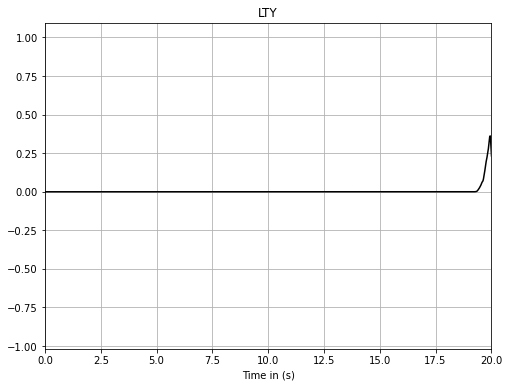

In [15]:
# we can use matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

itr=1 # you can change and make it range from 0 to len(tr)-1
t=np.linspace(0,60,int(60/tr[itr].stats.delta))
plt.plot(t,tr[itr].data[:len(t)]/np.max(np.abs(tr[itr].data)),'k')
plt.title(tr[itr].stats.station)
plt.xlabel('Time in (s)')
plt.grid(True)
# zoom in on specific time
plt.xlim([0,20])
# plt.xlim([20,100])

Now we can plot each of the data one by one. ``tr`` is an **array** of seismic ***streams***. ***Streams*** are basically **Obspy** objects that combine seismic station information and the time series. We can *iterate* through ``tr`` to plot each waveform. We can also zoom in on specific times to focus on different part of the waveforms.

In [25]:
print("there are "+str(len(tr))+" seismograms from these stations") # here we use "str" to convert an integer (len) into a string

there are 6 seismograms from these stations


Now we are going to see how the overall waves compare to each others.

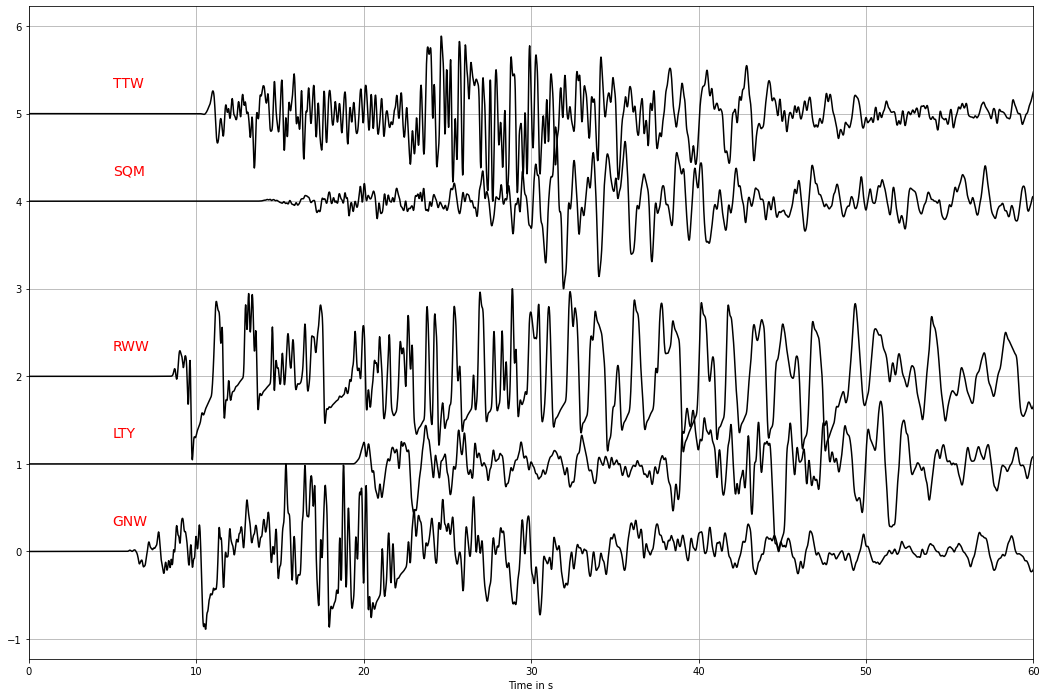

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (18,12)
for ii,itr in enumerate(tr):
    if itr.stats.station == "SEP":continue # this station "clipped", meaning that the shaking was too intense for the instrument
    t=np.linspace(0,60,int(60/itr.stats.delta))
    if len(itr.data)<len(t):continue
    crap=itr.copy()
    crap = crap.filter('bandpass',freqmin=0.05,freqmax=5)
    plt.plot(t,crap.data[:len(t)]/np.max(np.abs(crap.data))+ii,'k')
    plt.text(5,ii+0.3,itr.stats.station,fontsize=14,c='r')
plt.grid(True)
plt.xlim([0,60])
# plt.xticks(np.linspace(0,60,60))
plt.xlabel('Time in s')
plt.savefig('waveforms.png')



The figure above shows seismograms (data from seismometers) recording ground motion from the same earthquake at 5 different stations. A few things to note about this data:

* The vertical axis on the plot is the amplitude of ground motion. Individual seismograms or traces are scaled differently, and actually normalized.

* The waveforms may look jaggeted and not pure smooth oscillations. This is because this earthquake shaking was really, really strong and even damaged the soil. This was a very strongly felt earthquake with extensive damage.

* There is a high-frequency signal first, that is the P. The lower frequency that arrives next is likely the S wave.





## **Question 2**: 
For this question, assume the earthquake is at the surface, so depth is not a factor. 

> a. *The plot of all of the waveforms is saved into a waveforms.png file. Open the file and annotate it with what you think the P and S waves are on these seismograms. Save the file into another figure. You have the option to add the code line to import your figure within the notebook.*

Import the figure here (optional)

> b.   *Measure the S-P times for each station to complete the  column on the plot.* You can pick an approximate time on the plot, or use an annotation to your previous figures. Another way is to plot individual traces as shown above and "zoom in" by setting the command ``plt.xlim([t_1,t_2])``, where ``t_1`` and ``t_2`` are times of your choice.

> c. *Suppose $V_P$ = 6.0 km/s and $V_S$ = 3.47 km/s. These velocities are based on properties of the Earth’s crust. Use equation (7) to compute the effective $V_{s-p}$.*


> d) *Use equation (8), your computed value of $V_{s-p}$, and the S-P times that you measured for each station to populate the r column in the table below, where r is the distance from each station to the EQ that caused the ground motion recorded in the seismograms.*

In [27]:
import pandas as pd
print(sta)
# note that LON and SEP are missing for some reason
# Enter
{'GNW'}

['GNW', 'LTY', 'RWW', 'SEP', 'SQM', 'TTW']


### **Question 3:**
> a *On the map provided , annotate with circles around each station with a radius corresponding to the r that you computed for that station.*
The earthquake epicenter is where all the circles (or the most) intersect. Mark this single point with a star. This method of locating the earthquake epicenter is called triangulation.
  a. Note that you only have data for some of the stations on the map.
  b. If you don't have a compass, do your best without one. For example, you might draw a few radii from a station and then draw an arc connecting their endpoints.

> b. *Give at least two reasons why the circles may not exactly cross at a single point. Don't cite poor drawing – think about the myriad sources of error throughout this process.*

answer below:

> c. *What is the minimum number of S-P times needed to find the epicenter of an earthquake? Draw a diagram and explain in words why your answer is correct.*

Now we are going to locate an earthquake in a different way. The difference between the observed travel time, or the travel time observed from seismic data, and the predicted travel time, or the travel time predicted from a model, is called the travel time residual. One method
to find the location is to calculate the predicted travel times on a grid and find the grid point with the smallest residual. This is what we will do today.

The predicted travel time from an earthquake at ($x,y$) to the k$^{th}$ station with coordinates ($x_k,y_k$)

$t^p_k = \dfrac{\sqrt{ (x-x_k)^2 + (y-y_k)^2  }}{v}$, (9)

where $v$ is the appropriate seismic velocity. Note that the superscript p here is not a power, but just denotes the predicted travel time.

You can also use the seismogram recorded at the k$^{th}$ station to find the real, or, **observed travel time**. One way to locate an earthquake is to minimize the difference between the travel times predicted from the model, tp, and observed travel times, to. The expression for the travel time residual at the kth station is

$r_k = t_k^0 - t_k^p$ (10)

where $t_p^0$ is the observed travel time at station k and $t_k^p$ is the predicted travel time at station k.

We are going to minimize the residuals for a whole network of stations using the method of **least squares**. Here we will define the **misfit** of a certain grid point as the sum of the squared residuals of each station

$\epsilon = \sum_{k=1}^n r_k^2$, (11)

where $n$ is the number of stations.

Our goal is to find the grid point with minimum misfit. We will do this by assuming an earthquake location (x,y) and calculating the misfit 𝜖 for that location. We do this for many trial locations, and then find the location that fits the data the best.

The table below has the location (x and y coordinates) of 13 stations, as well as the observed P wave travel times at each station.

We are going to read the travel-time data from the CSV file "travel_times.csv" using Pandas. Pandas are a wonderful open-source python package to handle structured (tables) data.

In [28]:
import pandas as pd


pd = pd.read_csv("travel_times.csv")
print(pd)
# et voila!
# this reads the CSV file (a table) into a Pandas "data frame"



     x     y  Pwave travel-time
0    9  24.0              3.939
1   24  13.2              3.429
2   33   4.8              3.241
3   45  10.8              4.156
4   39  27.0              2.825
5   54  30.0              4.984
6   15  39.0              3.020
7   36  42.0              1.989
8   27  48.0              2.585
9   48  48.0              4.324
10  15  42.0              2.374
11  18  15.0              3.246
12  30  36.0              0.328


In [29]:
# Pandas data frames are great.
pd.head() # shows the top 5 rows

,x,y,Pwave travel-time
0,9,24.0,3.939
1,24,13.2,3.429
2,33,4.8,3.241
3,45,10.8,4.156
4,39,27.0,2.825


In [30]:
pd.describe() # runs some basic stats on the data in the file.

,x,y,Pwave travel-time
count,13.000000,13.000000,13.000000
mean,30.230769,29.215385,3.110769
std,13.935290,14.722197,1.183471
min,9.000000,4.800000,0.328000
25%,18.000000,15.000000,2.585000
50%,30.000000,30.000000,3.241000
75%,39.000000,42.000000,3.939000
max,54.000000,48.000000,4.984000


Assume the P wave velocity is 6 km/s. The steps outlined below will help you write a program in Python that uses this information to locate the earthquake using a grid search. Perform your grid search on a 100x100 km grid (10,000 locations).